## Plots AIC/BIC/objective vs. number of clusters

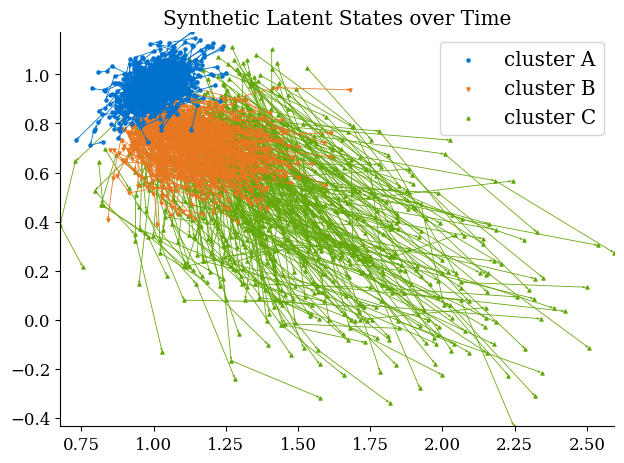

In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

from unsupervised_multimodal_trajectory_modeling.linear_gaussian import (
    marginalizable_mixture_model as mixmodel,
)
from unsupervised_multimodal_trajectory_modeling.util import (
    util_state_space as util,
)

%run data_synthetic.ipynb

plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = "upper right"
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 12

pwd = pathlib.Path().absolute()
alpha = 1.0
n_cluster_list = range(1, 8)

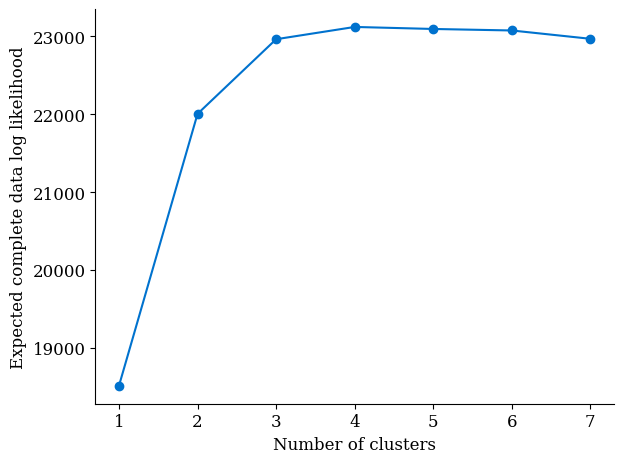

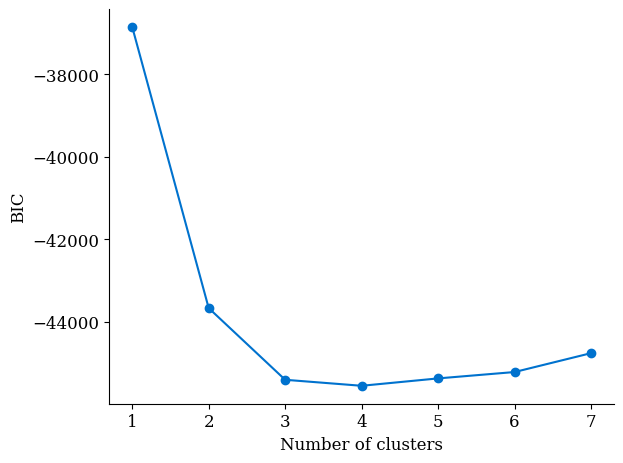

In [4]:
z_orig, x, c, _, _ = get_data(1000, rng=np.random.default_rng(42))
z, std_param = util.standardize(z_orig, return_params=True)

"""
train models with different numbers of clusters and compare results
"""

mdls = [
    mixmodel.MMLinGaussSS_marginalizable(
        n_clusters=n_clusters,
        states=z,
        observations=x,
        init="k-means",
        alpha=alpha,
    ).train_with_multiple_random_starts(n_starts=100, use_cache=True)
    for n_clusters in n_cluster_list
]

for s, attr in {
    "Expected complete data log likelihood": "e_complete_data_log_lik",
    # "AIC": "aic",
    "BIC": "bic",
}.items():
    fig, ax = plt.subplots()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.plot(
        n_cluster_list,
        [getattr(m, attr)() for m in mdls],
        "o-",
        color="#0072CE",
        linestyle="solid",
    )
    plt.xticks(
        ticks=n_cluster_list,
        labels=n_cluster_list,
    )
    # plt.title(f"{s} vs. number of clusters")
    ax.set_xlabel("Number of clusters")
    ax.set_ylabel(s)
    plt.tight_layout()